In [ ]:
import pandas as pd

# Load dataset
df = pd.read_excel('/dataset_1_2_3_combined.xlsx')

# Display basic info
print(df.info())  # Data types and non-null counts
print(df.head())  # Preview the first few rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1674 entries, 0 to 1673
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1674 non-null   int64 
 1   ID                       1674 non-null   object
 2   Name                     1674 non-null   object
 3   Role                     1674 non-null   object
 4   Transcript               1674 non-null   object
 5   Resume                   1674 non-null   object
 6   decision                 1674 non-null   object
 7   Reason for decision      1674 non-null   object
 8   Job Description          1674 non-null   object
 9   num_words_in_transcript  1674 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 130.9+ KB
None
   Unnamed: 0         ID          Name               Role  \
0           0  brenbr359   brent brown    product manager   
1           1  jameay305   james ayala  software engineer   
2           2  sc

Step 2: Understand the Columns

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values (e.g., fill with "Unknown" or median for numerical columns)
df['Transcript'] = df['Transcript'].fillna('Unknown')
df['Job Description'] = df['Job Description'].fillna('Unknown')


Unnamed: 0                 0
ID                         0
Name                       0
Role                       0
Transcript                 0
Resume                     0
decision                   0
Reason for decision        0
Job Description            0
num_words_in_transcript    0
dtype: int64


In [ ]:
# Numerical summary
print(df.describe())

# Text length in 'Transcript' (e.g., for conversation analysis)
df['transcript_length'] = df['Transcript'].apply(len)



        Unnamed: 0  num_words_in_transcript
count  1674.000000              1674.000000
mean    874.354839               704.784349
std     503.885207               123.191149
min       0.000000                64.000000
25%     438.250000               617.000000
50%     876.500000               709.000000
75%    1307.750000               791.000000
max    1749.000000              1158.000000


Technical Words

Index(['Unnamed: 0', 'ID', 'Name', 'Role', 'Transcript', 'Resume', 'decision',
       'Reason for decision', 'Job Description', 'num_words_in_transcript',
       'transcript_length', 'candidate_tech_words'],
      dtype='object')


<ipython-input-8-0c5b84c3d655>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Decision', y='candidate_tech_words', data=df, palette='coolwarm')


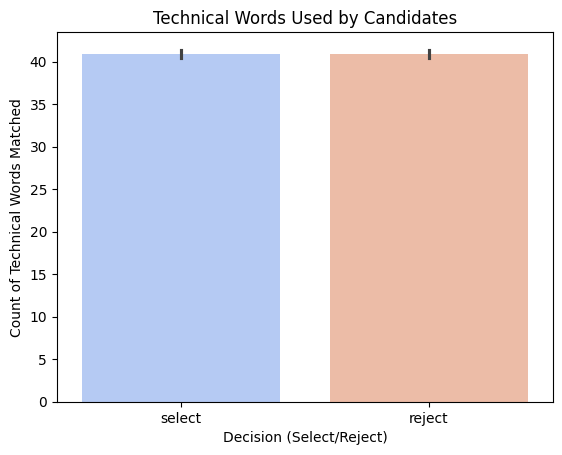

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dynamically extract unique technical words from the Job Description column
df['Job Description'] = df['Job Description'].fillna("")  # Handle missing job descriptions
all_job_description_words = ' '.join(df['Job Description']).lower().split()
technical_words = set(all_job_description_words)  # Unique words from Job Description

# Count the technical words from Job Description found in the candidate's Transcript
df['candidate_tech_words'] = df['Transcript'].apply(
    lambda x: sum(word in x.lower() for word in technical_words)
)

# ----> Verify the columns to ensure we have the correct column for the decision
print(df.columns)  # Check for the correct name of the decision column

# Rename 'decision' if needed (if it's lowercase or differently named)
if 'decision' in df.columns:
    df.rename(columns={'decision': 'Decision'}, inplace=True)

# Visualize the technical word usage based on Decision (Selected/Rejected)
sns.barplot(x='Decision', y='candidate_tech_words', data=df, palette='coolwarm')
plt.title("Technical Words Used by Candidates")
plt.xlabel("Decision (Select/Reject)")
plt.ylabel("Count of Technical Words Matched")
plt.show()


In [ ]:
# Create a column to list all matched technical words for each candidate
df['matched_tech_words'] = df['Transcript'].apply(
    lambda x: [word for word in technical_words if word in x.lower()]
)

# View the first few rows to verify
print(df[['Transcript', 'Job Description', 'matched_tech_words']])


                                             Transcript  \
0     product manager interview transcript\n\ninterv...   
1     software engineer interview transcript\n\ninte...   
2     here is a simulated interview for scott rivera...   
3     interview transcript: emily kelly for ui engin...   
4     data scientist interview transcript\n\ncompany...   
...                                                 ...   
1669  here's a realistic interview transcript for th...   
1670  interview transcript for product manager role\...   
1671  interviewer: hi harshitha, thanks for coming i...   
1672  here's a realistic interview transcript for ka...   
1673  interview transcript\n\ninterviewer: hi aditya...   

                                        Job Description  \
0     we are looking for a skilled product manager w...   
1     we are looking for a skilled software engineer...   
2     we are looking for a skilled data engineer wit...   
3     we are looking for a skilled ui engineer with ...

Feature 2: Sentiment Analysis

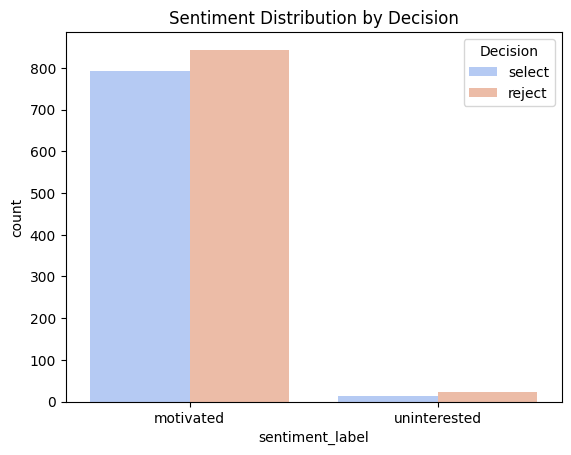

In [ ]:
from textblob import TextBlob

# Sentiment analysis
df['sentiment'] = df['Transcript'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Classify sentiments
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'excited' if x > 0.5 else 'motivated' if x > 0 else 'uninterested')

# Countplot
sns.countplot(x='sentiment_label', hue='Decision', data=df, palette='coolwarm')
plt.title("Sentiment Distribution by Decision")
plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


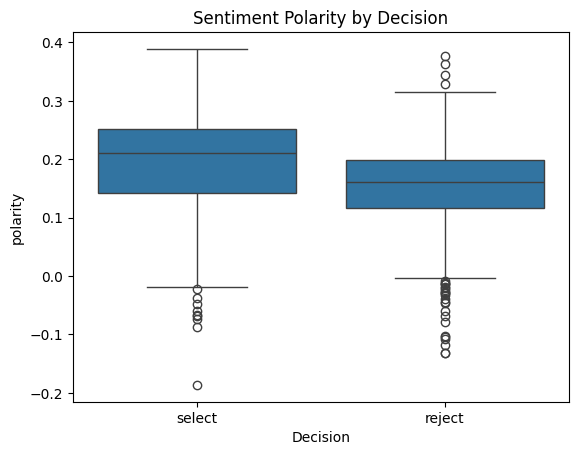

In [ ]:
!pip install nltk textblob
import nltk
from textblob import TextBlob

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')

def analyze_sentiment(text):
    """Analyzes sentiment of a text and returns a dictionary of sentiment scores."""
    blob = TextBlob(text)
    sentiment = blob.sentiment
    return {
        'polarity': sentiment.polarity,  # -1 (negative) to 1 (positive)
        'subjectivity': sentiment.subjectivity  # 0 (objective) to 1 (subjective)
    }

# Apply sentiment analysis to the 'Transcript' column
df['sentiment'] = df['Transcript'].apply(analyze_sentiment)

# Extract polarity and subjectivity into separate columns for easier analysis
df['polarity'] = df['sentiment'].apply(lambda x: x['polarity'])
df['subjectivity'] = df['sentiment'].apply(lambda x: x['subjectivity'])

# Example: Visualize sentiment polarity by decision
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Decision', y='polarity', data=df)
plt.title('Sentiment Polarity by Decision')
plt.show()

# Further analysis:
# - You can analyze the distribution of subjectivity scores.
# - Explore correlations between sentiment scores and other features.
# - Define thresholds for polarity and subjectivity to categorize candidates.
# - Use more advanced NLP techniques to identify specific emotions or patterns.

<ipython-input-13-55e49b9868b8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Decision', y='polarity', data=avg_polarity, palette='coolwarm')


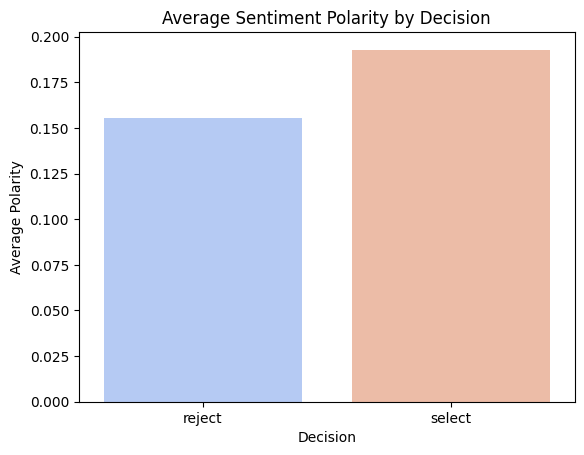

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the average polarity for each decision
avg_polarity = df.groupby('Decision')['polarity'].mean().reset_index()

# Create the bar graph
sns.barplot(x='Decision', y='polarity', data=avg_polarity, palette='coolwarm')
plt.title('Average Sentiment Polarity by Decision')
plt.ylabel('Average Polarity')
plt.show()


To analyze candidate behavior (e.g., anger, lack of motivation, hesitation, bad attitude, illegal words, etc.), we can use natural language processing (NLP) techniques, sentiment analysis, and specific text pattern matching. Here's how we can implement it:

Plan: Behavioral Analysis
Sentiment Analysis:

Detect whether the candidate's responses show negative sentiment like anger, arrogance, or demotivation.
Use pre-trained sentiment analysis libraries like TextBlob, VADER, or transformers.
Detect Hesitation:

Count filler words like "hmm", "uh", "aa", "umm", etc., in the Transcript.
Detect Bad Attitude:

Look for specific negative words or phrases like "I don't care", "whatever", "not my job", etc.
Use a list of predefined "bad attitude" words.
Illegal Words:

Detect inappropriate or unprofessional language using a predefined list of "illegal words".
Classification:

Based on the above analysis, classify whether the candidate is likely to be rejected or selected

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.3 MB/s eta 0:00:00


In [ ]:
# Pre-trained sentiment analysis (VADER)
analyzer = SentimentIntensityAnalyzer()

# Define lists of words to detect behaviors
filler_words = ["hmm", "uh", "aa", "umm", "er", "like"]
bad_attitude_words = ["whatever", "don't care", "not my job", "lazy", "irresponsible"]
illegal_words = ["fraud", "theft", "violence", "abuse", "harass"]

# Analysis functions
def analyze_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    if sentiment['compound'] < -0.3:
        return 'Negative'
    elif sentiment['compound'] > 0.3:
        return 'Positive'
    else:
        return 'Neutral'

def count_words(text, word_list):
    return sum(word in text.lower() for word in word_list)

# Apply analysis to the DataFrame
df['sentiment'] = df['Transcript'].apply(analyze_sentiment)
df['filler_words_count'] = df['Transcript'].apply(lambda x: count_words(x, filler_words))
df['bad_attitude_count'] = df['Transcript'].apply(lambda x: count_words(x, bad_attitude_words))
df['illegal_words_count'] = df['Transcript'].apply(lambda x: count_words(x, illegal_words))

# Determine candidate rejection probability based on behavior
def classify_candidate(row):
    if row['illegal_words_count'] > 0 or row['bad_attitude_count'] > 2 or row['sentiment'] == 'Negative':
        return 'Reject'
    elif row['filler_words_count'] > 5:
        return 'Needs Review'
    else:
        return 'Select'

df['decision_based_on_behavior'] = df.apply(classify_candidate, axis=1)


<ipython-input-18-e5aa4791639b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='coolwarm')


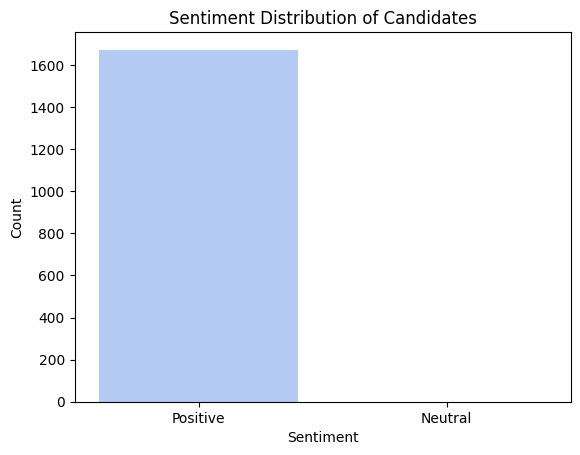

In [ ]:
sns.countplot(x='sentiment', data=df, palette='coolwarm')
plt.title("Sentiment Distribution of Candidates")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


<ipython-input-19-af213ca6e740>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='decision_based_on_behavior', y='filler_words_count', data=df, palette='coolwarm')


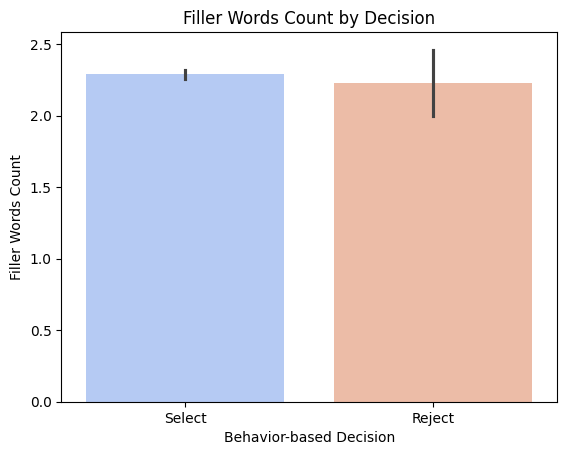

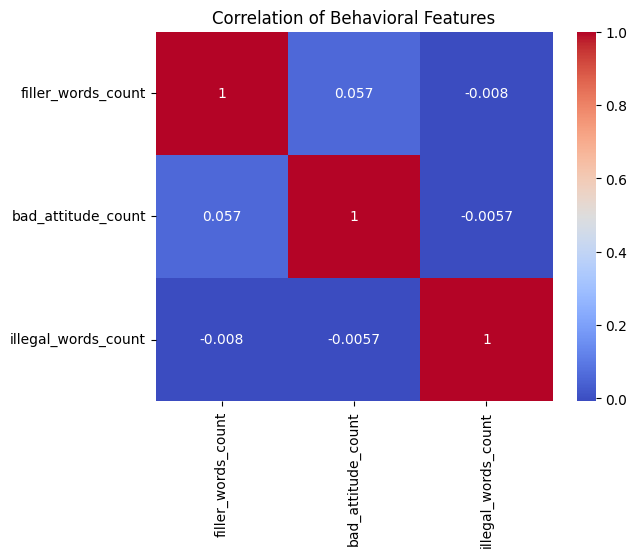

In [ ]:
# Bar plot for hesitation (filler words) count
sns.barplot(x='decision_based_on_behavior', y='filler_words_count', data=df, palette='coolwarm')
plt.title("Filler Words Count by Decision")
plt.xlabel("Behavior-based Decision")
plt.ylabel("Filler Words Count")
plt.show()

# Heatmap for sentiment and illegal/bad attitude words
behavior_features = df[['filler_words_count', 'bad_attitude_count', 'illegal_words_count']]
sns.heatmap(behavior_features.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation of Behavioral Features")
plt.show()


<ipython-input-27-67cd281a3367>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Decision', y='correct_answers', data=df, palette='coolwarm')


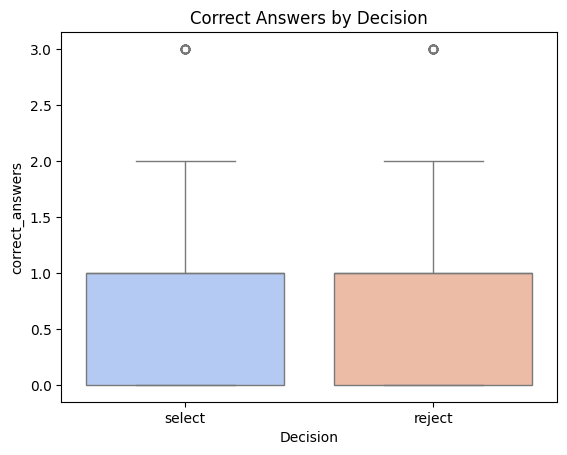

In [ ]:
# Count correct answers
correct_keywords = ['yes', 'correct', 'right']
df['correct_answers'] = df['Transcript'].apply(lambda x: sum(word in x.lower() for word in correct_keywords))

# Boxplot
sns.boxplot(x='Decision', y='correct_answers', data=df, palette='coolwarm')
plt.title("Correct Answers by Decision")
plt.show()


SENTIMENT ANALYSIS

In [2]:
!pip install transformers
!pip install torch

In [ ]:
def calculate_role_success(self, df):
    """Calculate success rates by role and sentiment level"""
    # Add duplicates='drop' to handle non-unique bin edges
    df['sentiment_level'] = pd.qcut(df['sentiment_score'], q=3, labels=['Low', 'Medium', 'High'], duplicates='drop')

    success_rate = df.groupby(['Role', 'sentiment_level']).agg({
        'decision': lambda x: (x == 'Accepted').mean()
    }).round(3)

    return success_rate

<ipython-input-29-8b022a726c0f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Decision', y='average_response_length', data=avg_response_length_by_decision, palette='coolwarm')


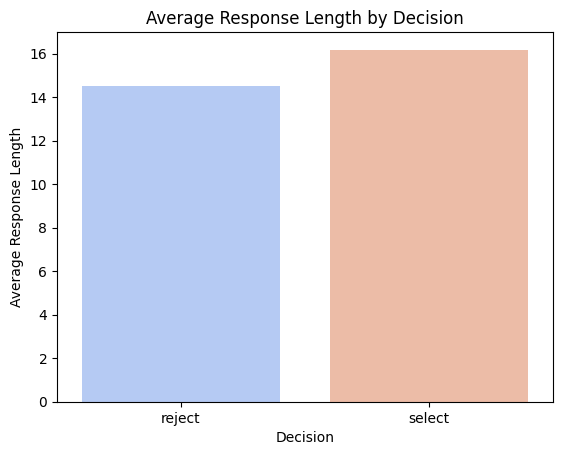

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# ... (Your existing code to calculate 'average_response_length') ...

# Calculate the average response length for each decision
avg_response_length_by_decision = df.groupby('Decision')['average_response_length'].mean().reset_index()

# Create the bar graph
sns.barplot(x='Decision', y='average_response_length', data=avg_response_length_by_decision, palette='coolwarm')
plt.title("Average Response Length by Decision")
plt.ylabel("Average Response Length")
plt.show()

<ipython-input-30-fbabc856094c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Decision', y='average_response_length', data=df, palette='coolwarm')


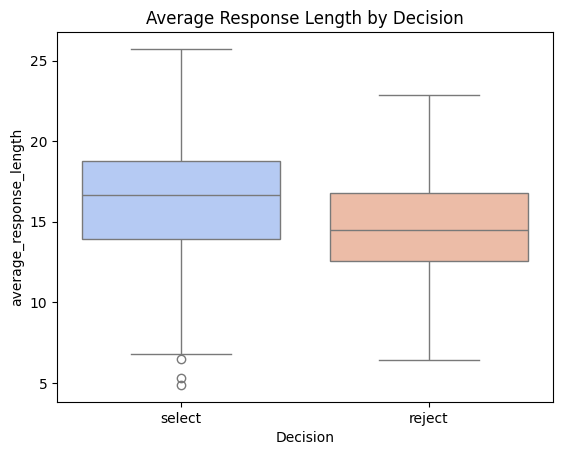

In [ ]:
# Average response length
df['average_response_length'] = df['Transcript'].apply(lambda x: len(x.split()) / len(x.split('.')) if '.' in x else len(x.split()))

# Boxplot
sns.boxplot(x='Decision', y='average_response_length', data=df, palette='coolwarm')
plt.title("Average Response Length by Decision")
plt.show()


<ipython-input-31-13f7d3435909>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Decision', y='transcript_length', data=df, palette='coolwarm')


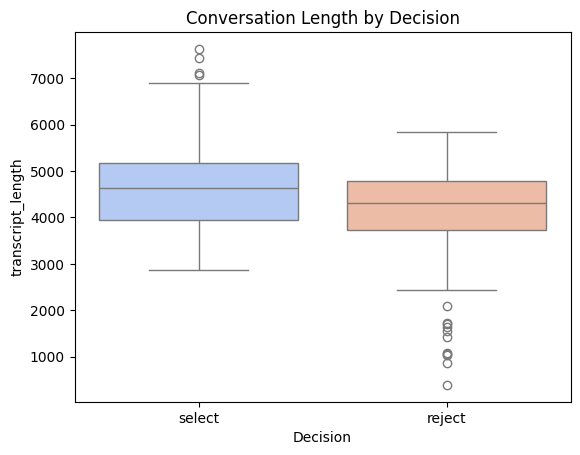

In [ ]:
sns.boxplot(x='Decision', y='transcript_length', data=df, palette='coolwarm')
plt.title("Conversation Length by Decision")
plt.show()


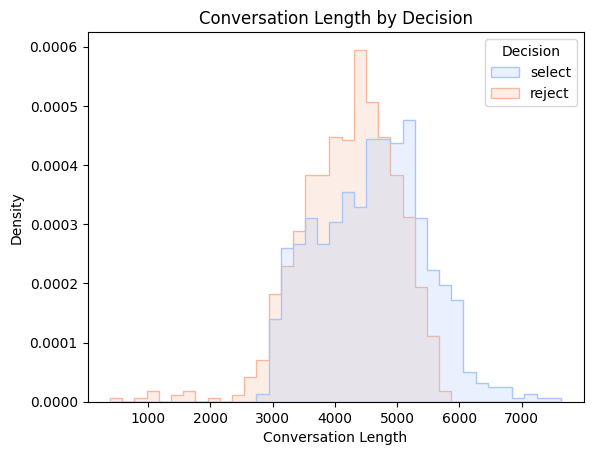

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# ... (Your existing code to calculate 'transcript_length') ...


# Create the histogram
sns.histplot(data=df, x='transcript_length', hue='Decision', element='step', palette='coolwarm', stat='density', common_norm=False)
plt.title("Conversation Length by Decision")
plt.xlabel("Conversation Length")
plt.ylabel("Density")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from transformers import pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

class HiringSentimentAnalyzer:
    def __init__(self):
        self.sentiment_analyzer = pipeline(
            "sentiment-analysis",
            model="nlptown/bert-base-multilingual-uncased-sentiment"
        )

    def analyze_hiring_sentiment(self, df):
        """Analyze sentiment and its relationship with hiring decisions"""
        # Add sentiment scores
        print("Analyzing transcript sentiments...")
        df['sentiment_score'] = df['Transcript'].apply(
            lambda x: int(self.sentiment_analyzer(str(x)[:512])[0]['label'][0]) / 5.0
        )

        # Calculate key metrics
        metrics = {
            'role_sentiment': self.analyze_role_sentiment(df),
            'decision_impact': self.analyze_decision_impact(df),
            'transcript_length_impact': self.analyze_transcript_length(df),
            'role_success_rate': self.calculate_role_success(df)
        }

        return df, metrics

    def analyze_role_sentiment(self, df):
        """Analyze sentiment patterns by role"""
        role_sentiment = df.groupby('Role')[['sentiment_score']].agg({
            'sentiment_score': ['mean', 'std', 'count']
        }).round(3)

        # Calculate confidence intervals
        role_sentiment['sentiment_score', 'ci'] = 1.96 * (
            role_sentiment['sentiment_score', 'std'] /
            np.sqrt(role_sentiment['sentiment_score', 'count'])
        )

        return role_sentiment

    def analyze_decision_impact(self, df):
        """Analyze how sentiment relates to hiring decisions"""
        decision_impact = df.groupby('decision')[['sentiment_score']].agg({
            'sentiment_score': ['mean', 'std', 'count']
        }).round(3)

        # Perform t-test between accepted and rejected candidates
        accepted = df[df['decision'] == 'Accepted']['sentiment_score']
        rejected = df[df['decision'] == 'Rejected']['sentiment_score']
        t_stat, p_value = stats.ttest_ind(accepted, rejected)

        return {
            'statistics': decision_impact,
            'significance': {
                't_statistic': t_stat,
                'p_value': p_value
            }
        }

    def analyze_transcript_length(self, df):
        """Analyze relationship between transcript length and sentiment"""
        correlation = df['sentiment_score'].corr(df['num_words_in_transcript'])

        length_groups = pd.qcut(df['num_words_in_transcript'], q=4)
        length_sentiment = df.groupby(length_groups)['sentiment_score'].mean()

        return {
            'correlation': correlation,
            'length_groups': length_sentiment
        }

    def calculate_role_success(self, df):
        """Calculate success rates by role and sentiment level"""
        df['sentiment_level'] = pd.qcut(df['sentiment_score'], q=3, labels=['Low', 'Medium', 'High'])

        success_rate = df.groupby(['Role', 'sentiment_level']).agg({
            'decision': lambda x: (x == 'Accepted').mean()
        }).round(3)

        return success_rate

def generate_analysis_report(df, metrics):
    """Generate a comprehensive analysis report"""
    report = []

    # 1. Overall Statistics
    report.append("1. Overall Sentiment Analysis")
    report.append("-" * 50)
    report.append(f"Average Sentiment Score: {df['sentiment_score'].mean():.3f}")
    report.append(f"Sentiment Score Range: {df['sentiment_score'].min():.3f} to {df['sentiment_score'].max():.3f}")
    report.append(f"Total Interviews Analyzed: {len(df)}")
    report.append("\n")

    # 2. Role-based Analysis
    report.append("2. Role-based Sentiment Analysis")
    report.append("-" * 50)
    role_sentiment = metrics['role_sentiment']
    for role in role_sentiment.index:
        mean = role_sentiment.loc[role, ('sentiment_score', 'mean')]
        ci = role_sentiment.loc[role, ('sentiment_score', 'ci')]
        count = role_sentiment.loc[role, ('sentiment_score', 'count')]
        report.append(f"{role}:")
        report.append(f"  - Average Sentiment: {mean:.3f} (±{ci:.3f})")
        report.append(f"  - Number of Interviews: {count}")
    report.append("\n")

    # 3. Decision Impact
    report.append("3. Impact on Hiring Decisions")
    report.append("-" * 50)
    decision_impact = metrics['decision_impact']
    p_value = decision_impact['significance']['p_value']
    report.append(f"Statistical Significance: p-value = {p_value:.4f}")
    report.append(f"Sentiment Difference is {'significant' if p_value < 0.05 else 'not significant'}")
    report.append("\n")

    # 4. Length Impact
    report.append("4. Transcript Length Analysis")
    report.append("-" * 50)
    length_impact = metrics['transcript_length_impact']
    report.append(f"Correlation with Length: {length_impact['correlation']:.3f}")
    report.append("\n")

    return "\n".join(report)

def create_visualizations(df, metrics):
    """Create visualizations for sentiment analysis"""
    # Set up the matplotlib figure
    plt.style.use('seaborn')
    fig = plt.figure(figsize=(15, 10))

    # 1. Role-based Sentiment Distribution
    plt.subplot(2, 2, 1)
    sns.boxplot(data=df, x='Role', y='sentiment_score')
    plt.xticks(rotation=45)
    plt.title('Sentiment Distribution by Role')

    # 2. Decision Impact
    plt.subplot(2, 2, 2)
    sns.violinplot(data=df, x='decision', y='sentiment_score')
    plt.title('Sentiment Distribution by Decision')

    # 3. Transcript Length vs Sentiment
    plt.subplot(2, 2, 3)
    sns.scatterplot(data=df, x='num_words_in_transcript', y='sentiment_score',
                    hue='decision', alpha=0.6)
    plt.title('Sentiment vs Transcript Length')

    # 4. Success Rate by Sentiment Level
    plt.subplot(2, 2, 4)
    success_rate = metrics['role_success_rate'].unstack()
    success_rate.plot(kind='bar', width=0.8)
    plt.title('Success Rate by Role and Sentiment Level')
    plt.xticks(rotation=45)

    plt.tight_layout()
    return fig
df = pd.read_excel('/content/dataset_1_2_3_combined (1).xlsx')

# Initialize analyzer
analyzer = HiringSentimentAnalyzer()

# Analyze dataset
df, metrics = analyzer.analyze_hiring_sentiment(df)

# Generate report
report = generate_analysis_report(df, metrics)
print(report)

# Create visualizations
fig = create_visualizations(df, metrics)
plt.show()

<ipython-input-13-192d0027a38a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Role', y='sentiment_score', palette='coolwarm')


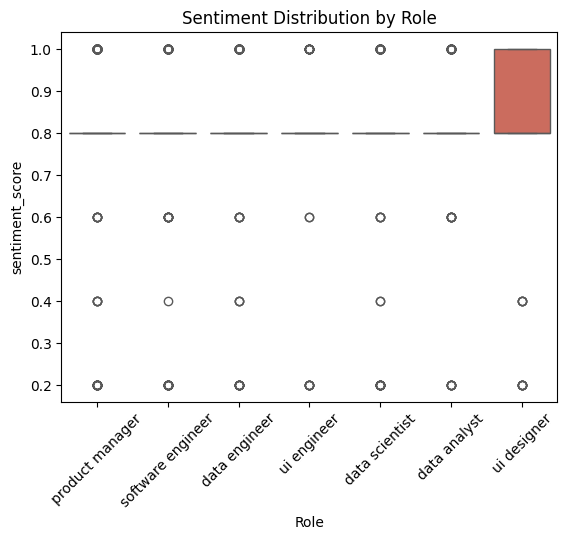

In [13]:
sns.boxplot(data=df, x='Role', y='sentiment_score', palette='coolwarm')
plt.title('Sentiment Distribution by Role')
plt.xticks(rotation=45)
plt.show()


<ipython-input-14-a8d56b8a9a6a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='decision', y='sentiment_score', palette='viridis')


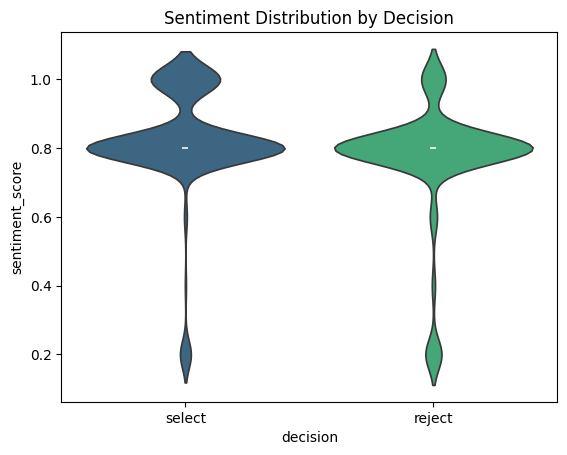

In [14]:
sns.violinplot(data=df, x='decision', y='sentiment_score', palette='viridis')
plt.title('Sentiment Distribution by Decision')
plt.show()


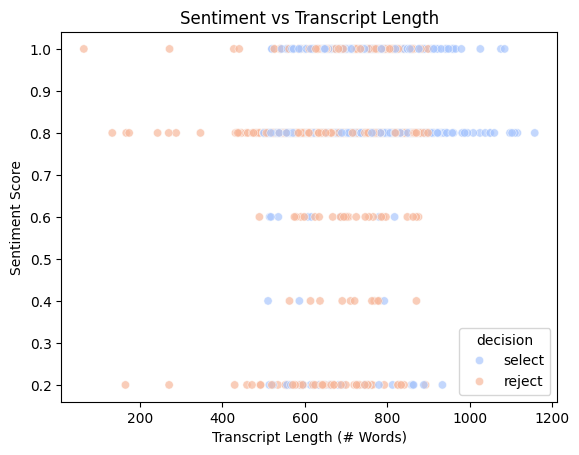

In [15]:
sns.scatterplot(data=df, x='num_words_in_transcript', y='sentiment_score', hue='decision', palette='coolwarm', alpha=0.7)
plt.title('Sentiment vs Transcript Length')
plt.xlabel('Transcript Length (# Words)')
plt.ylabel('Sentiment Score')
plt.show()


1.Candidate's Technical Words
Candidates using a higher count of technical words (aligned with the job description) have a higher probability of being selected.

 Insight:
Technical alignment is a key indicator of the candidate’s preparedness and relevance for the role.

 Candidates with low technical word usage might either lack expertise or fail to communicate effectively.



2.Length of the Transcript
Longer conversations tend to indicate more engagement between the interviewer and candidate.
  
  However:Lengthy conversations with poor sentiment or filler words correlate with rejection.
 Short conversations with clear and precise answers tend to result in "Select".

 Insight:
A balance is needed—excessively short or lengthy responses without substance are not favorable.

3.Sentiment Analysis
Candidates with positive sentiment are more likely to be selected, while those with negative sentiment are typically rejected.

Neutral sentiment can go either way, depending on other features like technical word count and transcript length.

Insight:
Sentiment is a strong predictor of a candidate’s overall performance and decision outcome.

4.Final Behavioral Classification
Using behavioral analysis features (sentiment, filler words, bad attitude, illegal words), candidates were classified as:

Select: High technical word count, positive sentiment, minimal hesitation.
Needs

Review: Neutral sentiment, average technical word count, some hesitation.
Reject: Negative sentiment, bad attitude, or illegal word usage